In [1]:
#!/usr/bin/python

import numpy as np
import math
from astropy.io import fits as fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from pandas import DataFrame, Series
from astropy.wcs import WCS as WCS

import import_ipynb
import Pipe3D_Asier_Test as Pipe3D

from mpdaf.obj import hms2deg
from mpdaf.obj import dms2deg

importing Jupyter notebook from Pipe3D_Asier_Test.ipynb


In [2]:
line = 'SN2006D'

In [3]:
df = pd.read_csv('Amusing_Table.csv')  # To find the Galaxy data
Names_1 = df['SN_name']
Names_2 = df['def_name']
R = 0

for names in Names_1:              # Finding the Galaxy in the DataFrame
    R=R+1
    if line == names:
        Row = R-1
R = 0
for names in Names_2:              # Some Galaxies have the name in other column
    R=R+1
    if line == names:
        Row = R-1

# Pixel de la SN
Pix_X = df.at[Row,'SNX'] -1
Pix_Y = df.at[Row,'SNY'] -1
# Pixel del centro de la Galaxia
Pix_X_GAL = df.at[Row,'GALX'] -1
Pix_Y_GAL = df.at[Row,'GALY'] -1

# Supernova type
if df.at[Row,'SN_type'] == 'Ia':
    SN_TYPE = 1
elif df.at[Row,'SN_type'] == 'II':
    SN_TYPE = 2
else:
    SN_TYPE = 0

In [4]:
# Call to Pipe3D code
line = Pipe3D.Pipe3D_galaxy(line)
# Generate the enviroment

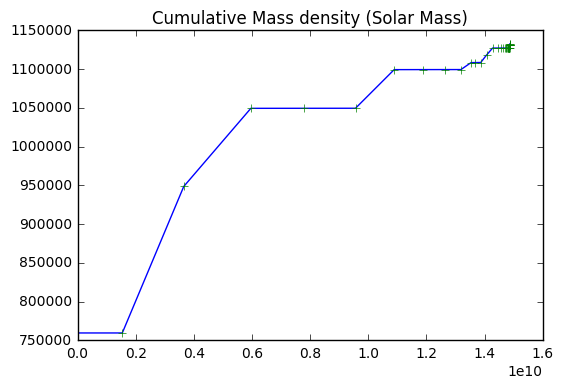

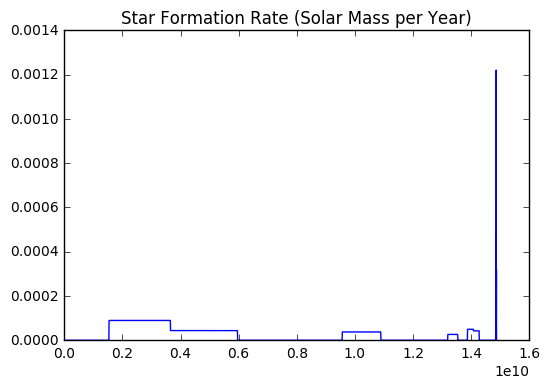

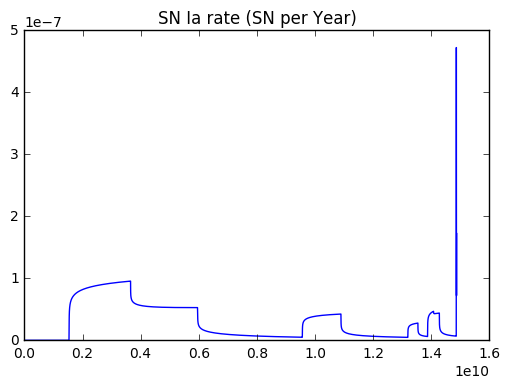

1.0822991156e-07
1.72068996572e-07


In [5]:
# Tau array sorted and unique
s_SSP_id, s_age_SSP, s_met, s_logML = np.loadtxt('SSP_logML.txt', unpack='True')
s_age_SSP_sorted = np.argsort( s_age_SSP )
s_age = np.unique(s_age_SSP)
s_tau = np.sqrt( np.r_[ 0, s_age ] * np.r_[ s_age, 2*s_age[-1]-s_age[-2] ] ) * 1e9 # geometric mean between SSP ages

# Cumulative mass density (Solas Mass)
mass_density = line.cumulative_surface_density_spaxel(160, 170, False )

# Cosmic time (years)
AgeUnivers = s_tau[len(s_tau)-1]
t = AgeUnivers - s_tau

# Correction for numerical problems
mass_density = mass_density[:len(mass_density)-1]
t = t[:len(t)-1]

# Linear Cosmic Time
dt= (t[0]-t[1])
time = t[0] - np.arange(t[0]/dt) *dt

# Todas las unidades son por parsec cuadrado!!

# Linear Cumulative Mass (Solar Mass)
cumulative_mass = np.interp(-time, -t, mass_density)

# Star formation rate (Solar Mass per years)
sfr = -np.gradient(cumulative_mass) / dt

# Delay Time Distribution (SN per Year per Solar Mass)
dtd = 1e-4 * time**-1

# SN Ia rate (SN per Year)
snr = dt * np.convolve(sfr,dtd)

plt.plot(time,cumulative_mass)
plt.plot(t,mass_density,'+')
plt.title('Cumulative Mass density (Solar Mass)')
plt.show()

plt.plot(time,sfr)
plt.title('Star Formation Rate (Solar Mass per Year)')
plt.show()

plt.plot(time,snr[len(snr)/2:])
plt.title('SN Ia rate (SN per Year)')
plt.show()

# Recent time to calculate de mean SN CC Rate (Million of years)
recent_time = 10
n = np.int(np.round(recent_time / (dt/1e6)))

# Puedo crear un DTD para las SNCC que sea una funcion escalon de ancho recent_time!!!!!!!!!!!!!!!

# Rate of SN Core Collapse (SN per year)
rateII = (cumulative_mass[0]-cumulative_mass[n])*1e-3/(n*dt)
print(rateII)

# Rate of SN Ia
rateIa = snr[len(snr)/2]
print(rateIa)

In [6]:
print(np.sum(dtd*dt)) # SN Ia per Solar Mass Formed.

0.00126115963388


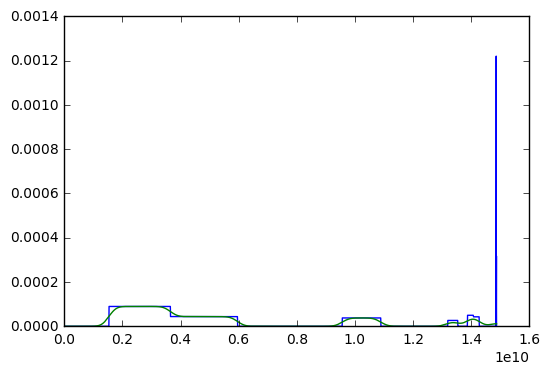

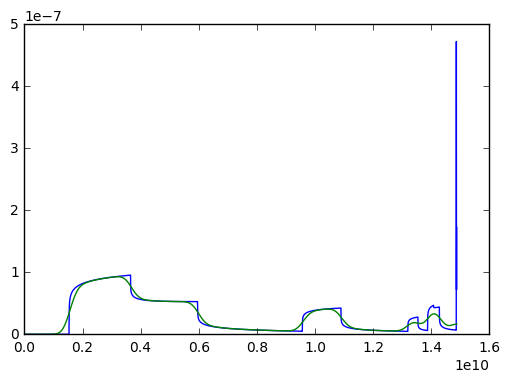

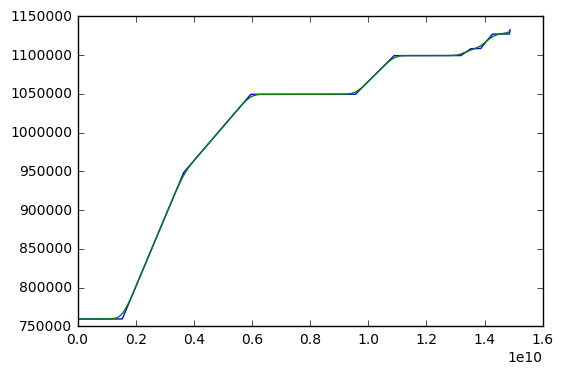

II raw = 1.0822991156e-07
II aprox=1.12727263239e-08
Ia raw = 1.72068996572e-07
Ia aprox=1.63291322701e-08
4.36046955649e-05


In [7]:
from scipy import signal
temporal_smooth = 200 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)

formacion = np.convolve(sfr,gaus)/np.sum(gaus)
formacion = formacion[len(formacion)/4:len(formacion)*3/4]

plt.plot(time,sfr)
plt.plot(time,formacion)
plt.show()

supernova = dt * np.convolve(formacion,dtd)

plt.plot(time,snr[len(snr)/2:])
plt.plot(time,supernova[len(supernova)/2:])
plt.show()

masa = np.flipud(np.cumsum(np.flipud(formacion*dt))) + cumulative_mass[len(cumulative_mass)-1]

plt.plot(time,cumulative_mass)
plt.plot(time,masa)
plt.show()

ratioII = (masa[0]-masa[n])*1e-3/(n*dt)
print('II raw = {}'.format(rateII))
print('II aprox={}'.format(ratioII))

ratioIa = supernova[len(supernova)/2]
print('Ia raw = {}'.format(rateIa))
print('Ia aprox={}'.format(ratioIa))


print(sfr[len(formacion)*3/4])

In [8]:
print(100*(np.sum(sfr*dt)-np.sum(formacion*dt))/np.sum(sfr*dt)) # Porcentaje de masa perdida.
print(100*(np.sum(sfr[:n]*dt)-np.sum(formacion[:n]*dt))/np.sum(sfr[:n]*dt)) # Porcentaje de masa reciente perdida

0.719314140126
91.1873913341


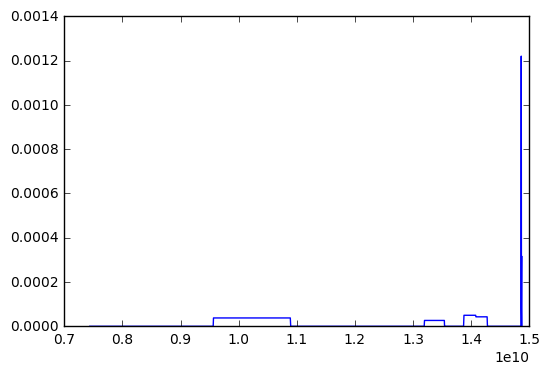

[  1.12590335e-05]


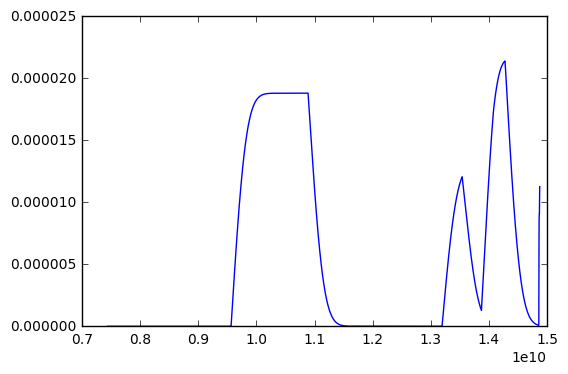

1.12590334636e-05


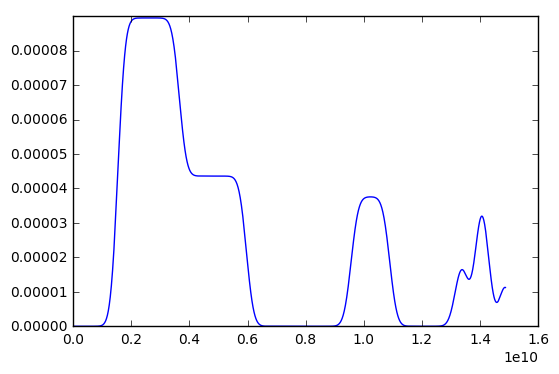

1.12590334636e-05


In [9]:
temporal_smooth = 200 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)

gaus = gaus/np.sum(gaus)

gaus = gaus[:len(gaus)/2]


sfr2 = sfr[:len(gaus)]
time2 = time[:len(gaus)]

plt.plot(time2,sfr2)
plt.show()

rat = np.convolve(sfr2,gaus,'valid')
print(rat)


sfr3 = np.convolve(sfr2,gaus)

plt.plot(time2,sfr3[(len(sfr3))/2:])
plt.show()

rat = sfr3[len(sfr3)/2]
print(rat)

plt.plot(time,formacion)
plt.show()

print(formacion[0])

1732050.80757
